KÜTÜPHANELER


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

VERİYİ ÇEKME


In [2]:
df = pd.read_csv("veri-seti.csv")
df

,Pregnant Number,Plasma Glucose,Diolastic Blood Pressure(mm Hg),Triceps Skinfold Thickness(mm),2-Hours Serum Insulin(mu U/ml),Body Mass Index,Diabetes Pedigree Function,Age,Diabet
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


VERIYI MAKINE OGRENMESI ICIN HAZIRLAMA


In [3]:
X = df.drop(columns=['Diabet'])
y = df['Diabet']

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [5]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

ÇOKLU DOGRUSAL REGRESYON MODELI OLUSTURMA

In [11]:
from sklearn.linear_model import LinearRegression
import numpy as np

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

threshold = 0.5

linear_reg_predictions = linear_reg.predict(X_test)

binary_predictions = [1 if prediction >= threshold else 0 for prediction in linear_reg_predictions]

# Doğrusal regresyon modelinin katsayılarını raporlama
coefficients = linear_reg.coef_
intercept = linear_reg.intercept_

print("Doğrusal Regresyon Katsayıları:")
for feature, coef in zip(X.columns, coefficients):
    print(feature, ":", coef)

print("\nKesim Noktası (Intercept):", intercept)

Doğrusal Regresyon Katsayıları:
Pregnant Number : 0.21036907085061463
Plasma Glucose : 1.346654196839101
Diolastic Blood Pressure(mm Hg) : -0.2719481061758857
Triceps Skinfold Thickness(mm) : -0.032658460267958156
2-Hours Serum Insulin(mu U/ml) : -0.1798254804602495
Body Mass Index : 0.8249883350022446
Diabetes Pedigree Function : 0.30792484834091355
Age : 0.12423495568393728

Kesim Noktası (Intercept): -0.8109216706996949


CONFUSION MATRIX REPORT VE HEATMAP

Confusion Matrix:
[[134  14]
 [ 35  48]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       148
           1       0.77      0.58      0.66        83

    accuracy                           0.79       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.79      0.79      0.78       231



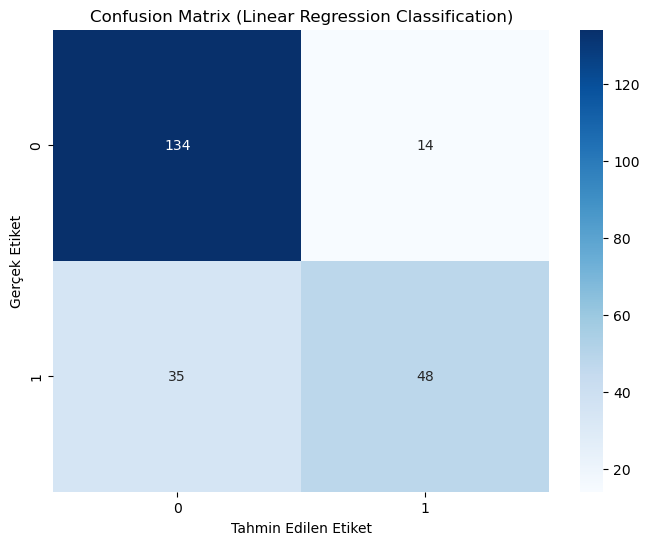

In [9]:
conf_matrix = confusion_matrix(y_test, binary_predictions)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, binary_predictions))




import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap oluşturma
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Linear Regression Classification)")
plt.xlabel("Tahmin Edilen Etiket")
plt.ylabel("Gerçek Etiket")
plt.show()